In [1]:
import torch
from torchvision.models import vit_b_16, ViT_B_16_Weights
from ImageNetLabels import idx_to_label

In [2]:
mytestmodel = vit_b_16(weights=ViT_B_16_Weights.IMAGENET1K_V1)
mytestmodel

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [41]:
from torchvision import transforms

preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224, 224))
])

In [42]:
from PIL import Image

img = Image.open("mouse.jpg")
input = preprocess(img)
prediction = mytestmodel(input.unsqueeze(0))
prediction = torch.argmax(prediction, 1)

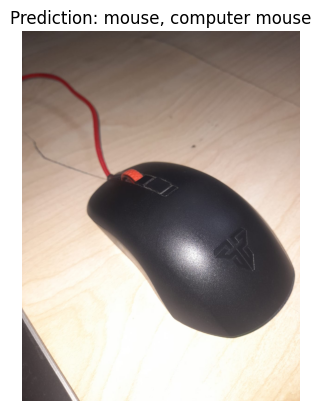

In [43]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.title('Prediction: ' + idx_to_label(prediction.item())) 
plt.axis('off')
plt.show()